<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Convolution-Neural-Network-Projects/blob/master/Rock_Paper_or_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the data**

```
Rock Paper Scissor Synthetic Dataset using CGI
```



In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

--2020-03-18 21:17:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  90.2MB/s    in 2.1s    

2020-03-18 21:17:07 (90.2 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-03-18 21:17:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M  35.2MB/s    in 0.8s    

2020-03-18 21:17:13 (35.2 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]





```
Extracting the data into /temp folder
```



In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rps')
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rps-test-set')
zip_ref.close()



```
Directories of the data
```



In [0]:
# Directory with our training paper pictures
paper_dir = os.path.join('/tmp/rps/rps/paper')
paper_names = os.listdir(paper_dir)

# Directory with our training rock pictures
rock_dir = os.path.join('/tmp/rps/rps/rock')
rock_names = os.listdir(rock_dir)

# Directory with our training scissors pictures
scissors_dir = os.path.join('/tmp/rps/rps/scissors')
scissors_names = os.listdir(scissors_dir)

# Directory with our test paper pictures
val_paper_dir = os.path.join('/tmp/rps-test-set/rps-test-set/paper')
val_paper_names = os.listdir(val_paper_dir)

# Directory with our test rock pictures
val_rock_dir = os.path.join('/tmp/rps-test-set/rps-test-set/rock')
val_rock_names = os.listdir(val_rock_dir)

# Directory with our test scissors pictures
val_scissors_dir = os.path.join('/tmp/rps-test-set/rps-test-set/scissors')
val_scissors_names = os.listdir(val_scissors_dir)



```
Checking the Number of Images
```



In [5]:
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

print('total test paper images:', len(os.listdir(val_paper_dir)))
print('total test rock images:', len(os.listdir(val_rock_dir)))
print('total test scissors images:', len(os.listdir(val_scissors_dir)))

total training paper images: 840
total training rock images: 840
total training scissors images: 840
total test paper images: 124
total test rock images: 124
total test scissors images: 124




```
Visualising the data
```



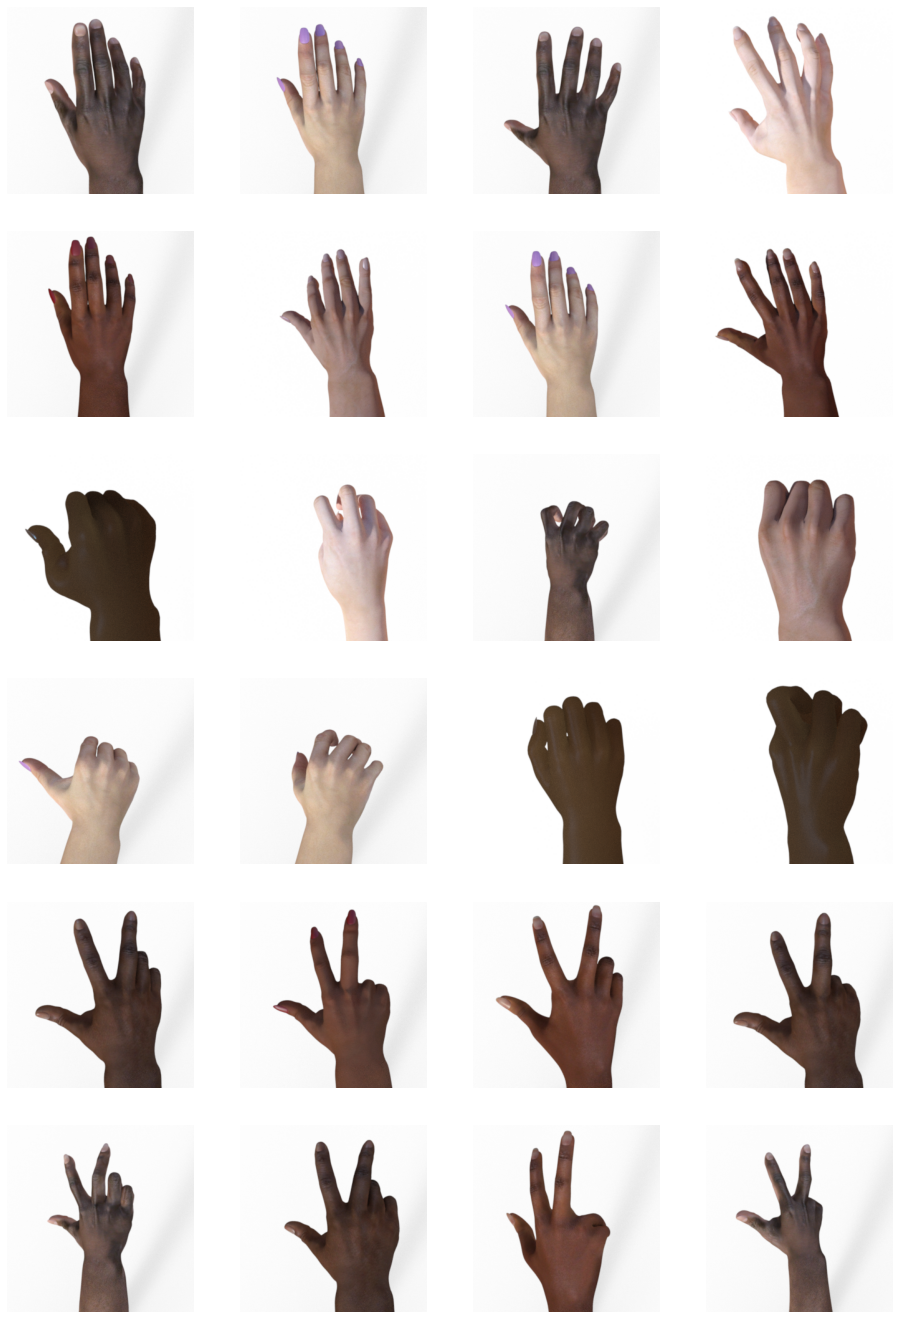

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 6
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_paper_pix = [os.path.join(paper_dir, fname) 
                for fname in paper_names[pic_index-8:pic_index]]
next_rock_pix = [os.path.join(rock_dir, fname) 
                for fname in rock_names[pic_index-8:pic_index]]
next_scissors_pix = [os.path.join(scissors_dir, fname) 
                for fname in scissors_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_paper_pix+next_rock_pix+next_scissors_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building the model**

**Importing the libraries**

In [7]:
import tensorflow as tf

**Defining the model**

In [8]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________

**Compiling the model**

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

**Preprocessing using ImageDataGenerator**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/tmp/rps/rps', # This is the source directory for training images
                                                   target_size=(150, 150), # All images will be resized to 150x150
                                                   class_mode='categorical')

# Flow validation images in batches of 32 using train_datagen generator
validation_generator = train_datagen.flow_from_directory('/tmp/rps-test-set/rps-test-set', # This is the source directory for training images
                                                   target_size=(150, 150), # All images will be resized to 150x150
                                                   class_mode='categorical')


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


**Training the model**

In [11]:
history = model.fit_generator(
      train_generator,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator)

model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 33s 423ms/step - loss: 1.1199 - acc: 0.3690 - val_loss: 1.0251 - val_acc: 0.5726
Epoch 2/25
79/79 [==============================] - 25s 323ms/step - loss: 0.9431 - acc: 0.5421 - val_loss: 0.6790 - val_acc: 0.7097
Epoch 3/25
79/79 [==============================] - 25s 322ms/step - loss: 0.6444 - acc: 0.7198 - val_loss: 0.4183 - val_acc: 0.8360
Epoch 4/25
79/79 [==============================] - 26s 323ms/step - loss: 0.4658 - acc: 0.8230 - val_loss: 0.3099 - val_acc: 0.8871
Epoch 5/25
79/79 [==============================] - 25s 320ms/step - loss: 0.3466 - acc: 0.8770 - val_loss: 0.2323 - val_acc: 0.9140
Epoch 6/25
79/79 [==============================] - 26s 324ms/step - loss: 0.2787 - acc: 0.9004 - val_loss: 0.2746 - val_acc: 0.8656
Epoch 7/25
79/79 [==============================] - 26s 324ms/step - loss: 0.2479 - acc: 0.9167 - val_loss: 0.2849 - val_acc: 0.8763
Epoch 8/25
79/79 [==============================] - 26s 325ms/step - 

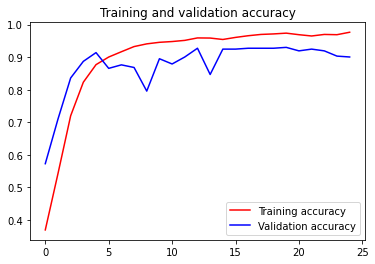

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

**Prediction**

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Using TensorFlow backend.


Saving Screenshot 2020-03-09 at 12.50.07 AM.png to Screenshot 2020-03-09 at 12.50.07 AM.png
[0.]
Screenshot 2020-03-09 at 12.50.07 AM.png is a horse
